In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF

df_adults = pd.read_csv('../data/adults-coarse.csv')

selected_columns = ['workclass', 'marital_status', 'occupation', 'relationship', 
                    'race', 'sex', 'native_country', 'salary_class']
selected_df = df_adults[selected_columns]

In [2]:
components = 16
model = NMF(n_components=int(components), init='random', random_state=0)
W = model.fit_transform(np.array(selected_df))

In [3]:
reconstructed = model.inverse_transform(W)

rows, cols = reconstructed.shape
for i in range(rows):
    for j in range(cols):
        reconstructed[i,j] = int(round(reconstructed[i,j]))

reconstructed_df = pd.DataFrame(reconstructed)
reconstructed_df.columns = selected_columns

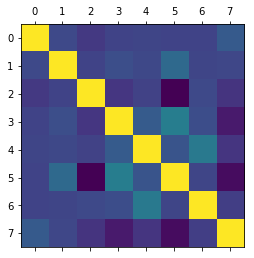

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.matshow(selected_df.corr())

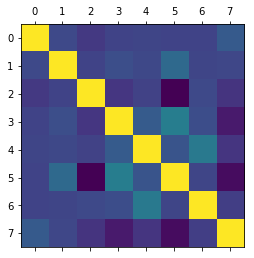

In [5]:
reconstructed_df.corr()
plt.matshow(reconstructed_df.corr())

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


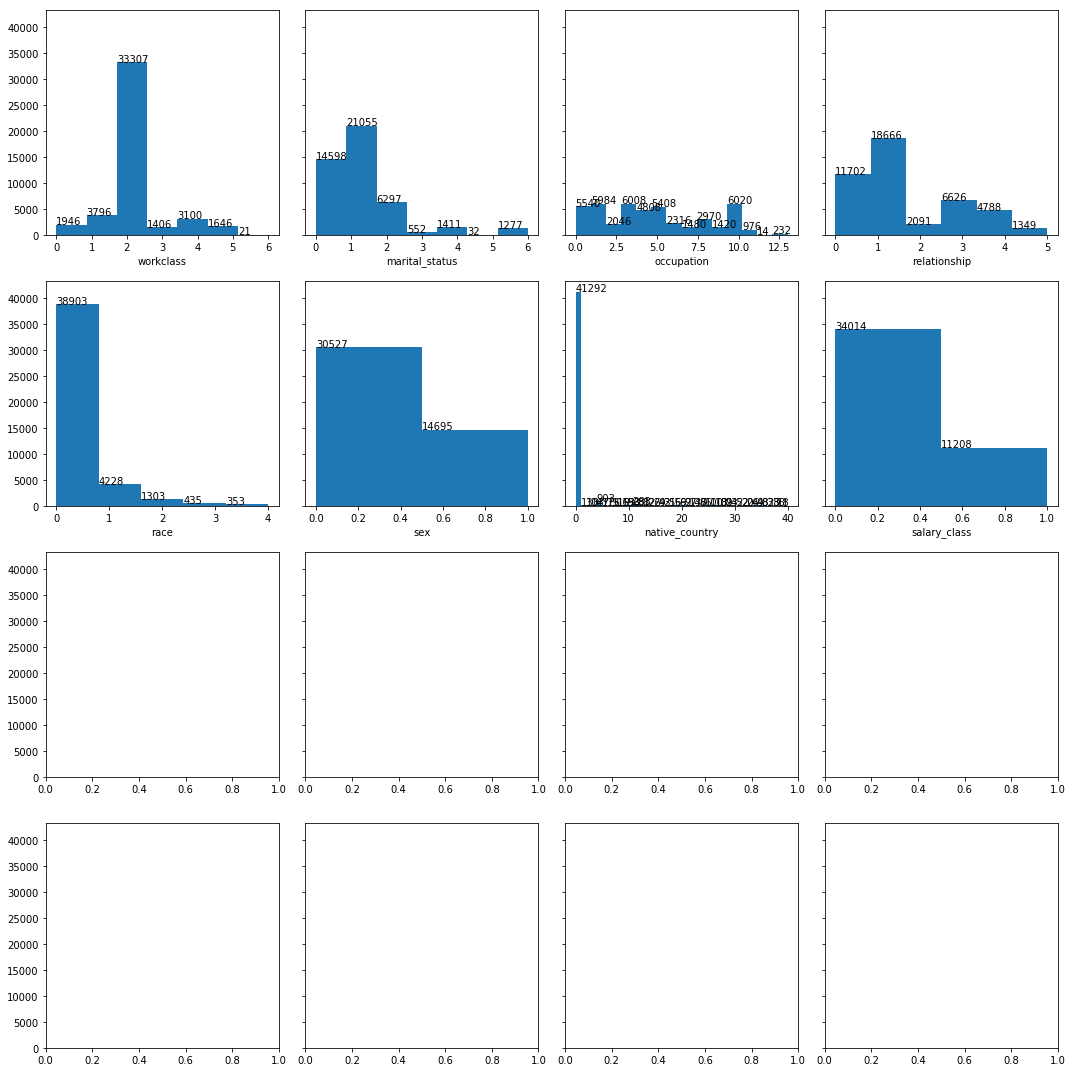

In [6]:
%matplotlib inline
import plot_hist

plot_hist.show(selected_df, size = 15)

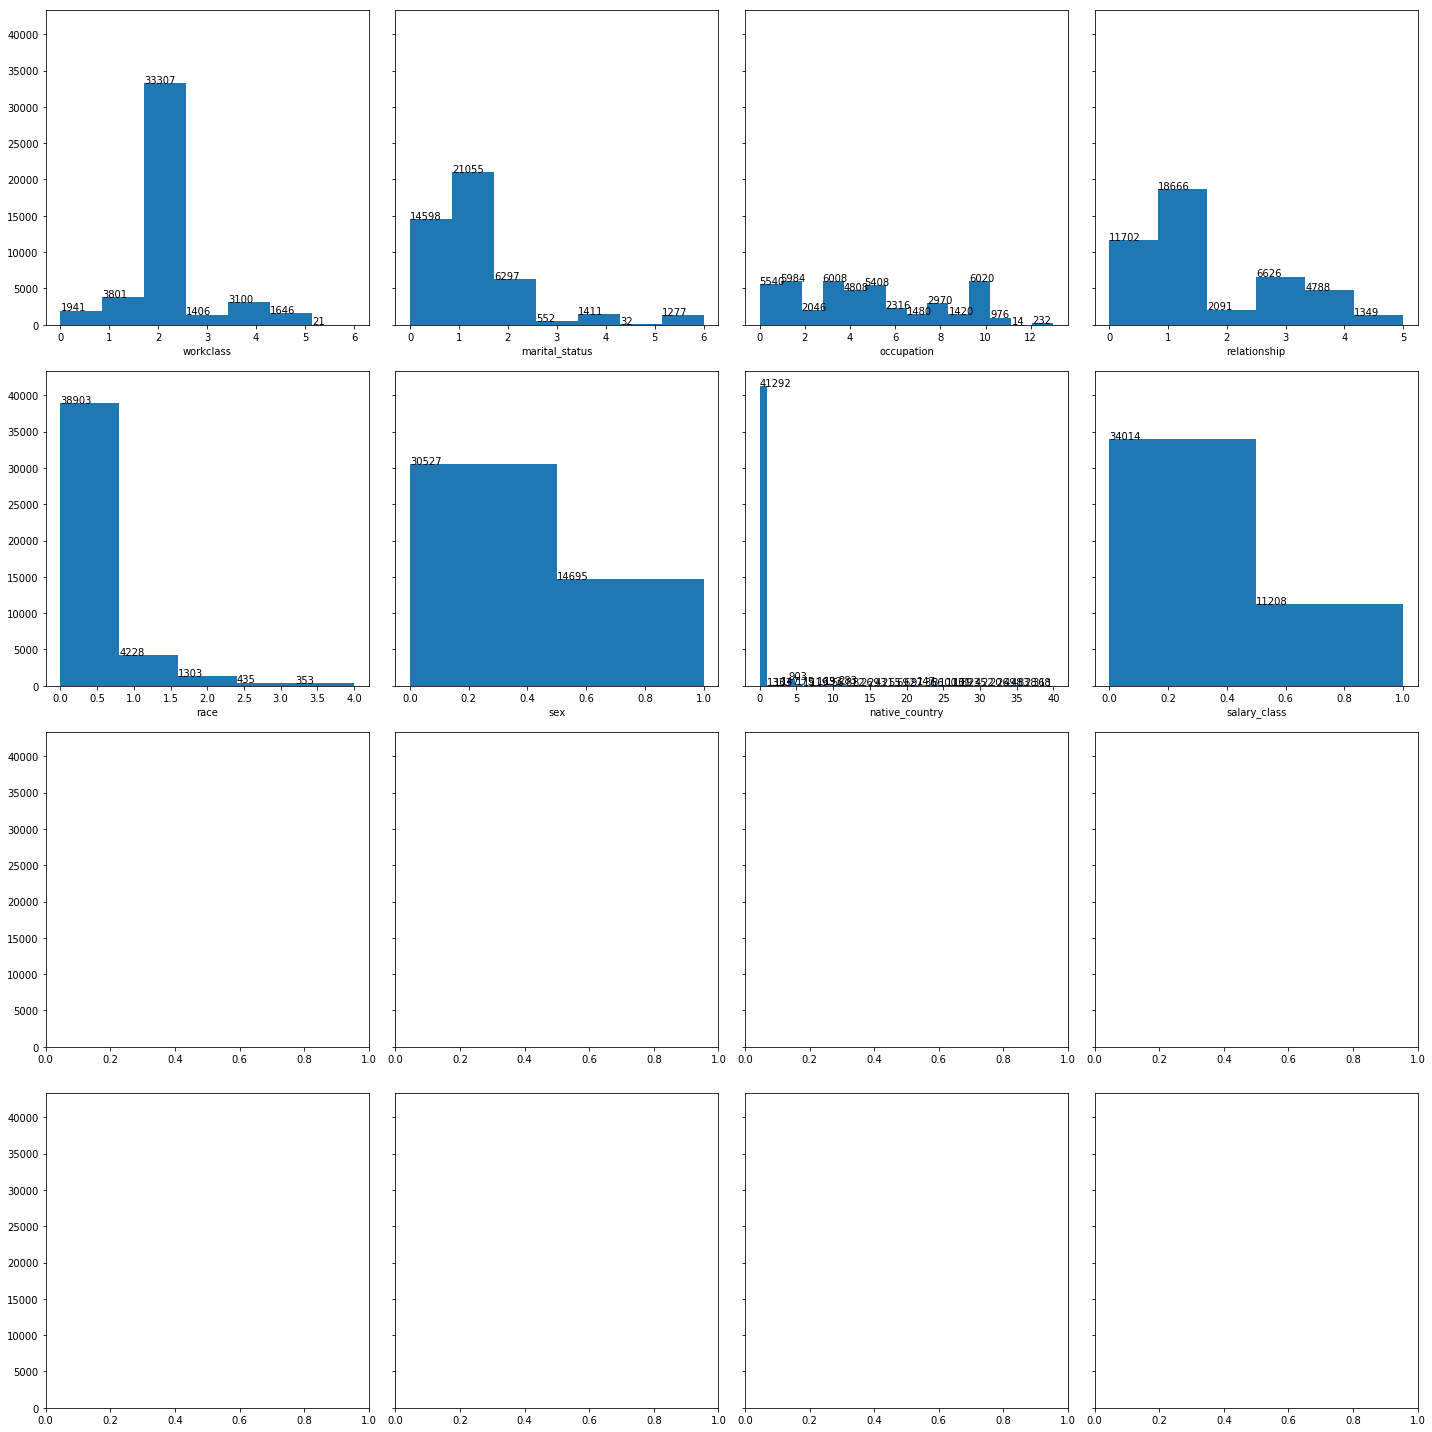

In [7]:
plot_hist.show(reconstructed_df)